# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
CDNow用户购买行为数据分析

# 1 数据加载与描述性统计

In [2]:
columns=['user_id','order_dt','order_products','order_amount']#生成列名
df=pd.read_csv('examples\CDNOW.txt',names=columns,sep='\s+')#载入数据 ，\s+表示字符串是空格分割

In [3]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [6]:
df0_1 = df[df.order_amount == 0.0]

In [7]:
df0_1

,user_id,order_dt,order_products,order_amount
1548,455,19970102,1,0.0
2446,713,19970103,1,0.0
3066,908,19970104,1,0.0
3118,925,19970104,1,0.0
3623,1101,19970105,1,0.0
3849,1186,19970105,1,0.0
3943,1225,19970105,1,0.0
4329,1381,19970106,1,0.0
4398,1401,19970106,1,0.0
5617,1753,19970107,1,0.0


# 2 初步分析

In [8]:
df['order_date']=pd.to_datetime(df['order_dt'],format='%Y%m%d')#转换格式
df['month']=df['order_date'].values.astype('datetime64[M]')#以月作为消费频率

In [9]:
df.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [10]:
user_consume=df.groupby('user_id').sum()[['order_products','order_amount']]#单个用户的消费情况
user_consume.head()

,order_products,order_amount
user_id,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61


In [11]:
user_consume.describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


In [ ]:
从用户角度看，每位用户平均购买7张CD，最多的用户购买了1033张，该用户可能是CD的忠实爱好者或者收藏家，或者是进行二次销售的小商贩。
用户的平均消费金额是106元，标准差是240，结合分位数和最大值看，平均值和75分位接近，因此可以得出存在小部分的高额消费用户。

In [12]:
month_consume=df.groupby('month').sum()[['order_products','order_amount']]#每月的消费情况
month_consume.head()

,order_products,order_amount
month,,
1997-01-01,19416,299060.17
1997-02-01,24921,379590.03
1997-03-01,26159,393155.27
1997-04-01,9729,142824.49
1997-05-01,7275,107933.30


In [13]:
month_consume.describe()

,order_products,order_amount
count,18.000000,18.000000
mean,9326.722222,138906.423889
std,6760.373744,103884.935965
min,4697.000000,66231.520000
25%,5437.250000,78309.920000
50%,6846.500000,101755.325000
75%,8051.250000,120421.320000
max,26159.000000,393155.270000


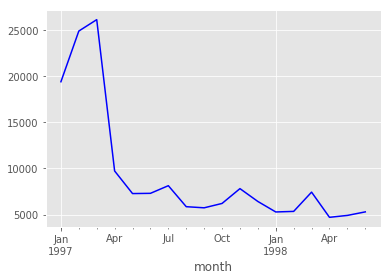

In [54]:
month_consume.order_products.plot(color = 'blue')#月度订单折线图

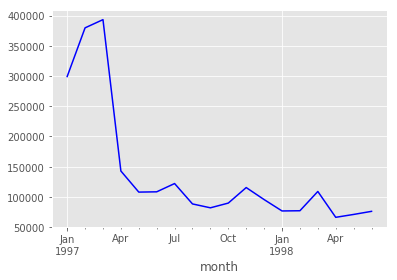

In [53]:
month_consume.order_amount.plot(color = 'blue')#月度销售额折线图

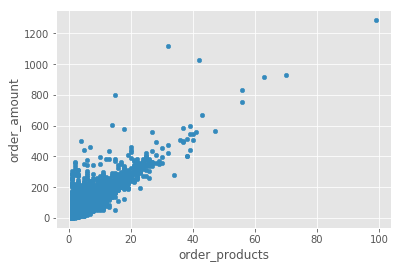

In [17]:
df.plot.scatter(x='order_products',y='order_amount')#每单订单数和订单金额散点图

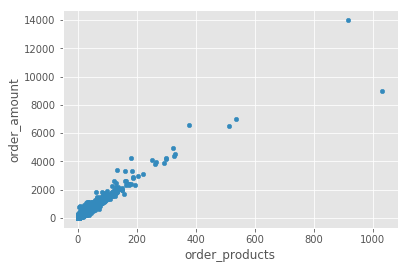

In [18]:
user_consume.plot.scatter(x='order_products',y='order_amount')#每人订单数和销售额散点图

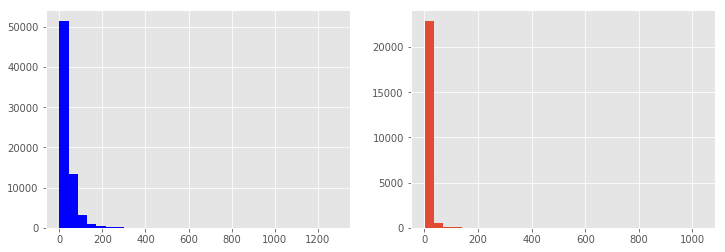

In [52]:
fig=plt.figure(figsize=(12,4))
fig.add_subplot(1,2,1)
df.order_amount.hist(bins=30,color = 'blue')
fig.add_subplot(1,2,2)
user_consume.order_products.hist(bins=30)

In [20]:
df.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [21]:
df.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

# 3 按月复购率、回购率分析

In [22]:
# 数据透视
pivoted_counts=df.pivot_table(index='user_id',columns='month',values='order_dt',aggfunc='count').fillna(0)
columns_month=df.month.sort_values().astype('str').unique()
pivoted_counts.columns=columns_month
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
pivoted_counts_reorder=pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)#统计消费用户是否复购
pivoted_counts_reorder.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

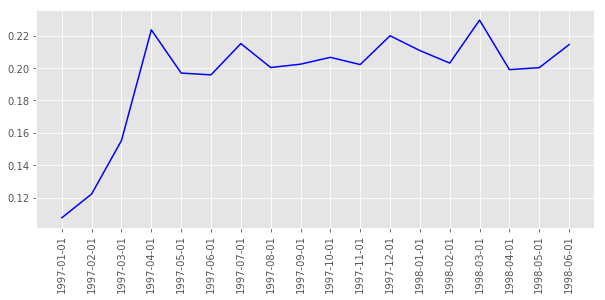

In [49]:
month_counts_reorder_rate=pd.DataFrame(pivoted_counts_reorder.sum()/pivoted_counts_reorder.count())#计算复购率
plt.figure(figsize=(10,4))
plt.plot(month_counts_reorder_rate,color = 'blue')
plt.xticks(rotation=90)

In [27]:
#统计用户是否回购
def func_repurchase(data):
    status=[]
    for i in range(data.count()-1):
        if data[i]>0:
            if data[i+1]>0:
                status.append(1)
            else:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status,index=data.index)
repurchase=pivoted_counts.apply(func_repurchase,axis=1)
repurchase.head(5)

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

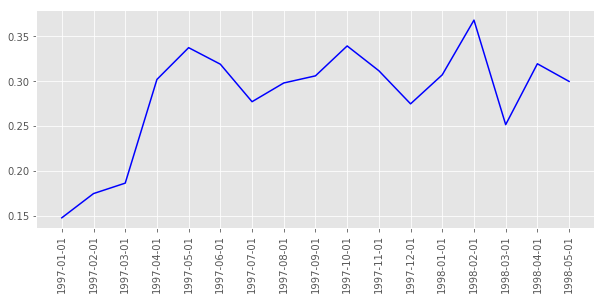

In [48]:
repurchase_rate=pd.DataFrame(repurchase.sum()/repurchase.count())#计算复购率
plt.figure(figsize=(10,4))
plt.plot(repurchase_rate,color = 'blue')
plt.xticks(rotation=90)

# 4 用户分层分析

In [30]:
#用户分层
def active_status(data):
    status=[]
    if data[0]==0:
        status.append('unreg')
    else:
        status.append('new')
    for i in range(data.count()-1):
        if data[i+1]==0:
            if status[i]=='unreg':
                status.append('unreg')
            else:
                status.append('unactive')
        else:
            if status[i]=='unreg':
                status.append('new')
            elif data[i]>0:
                status.append('active')
            else:
                status.append('return')
    return pd.Series(status,index=data.index)
pivoted_purchase_status=pivoted_counts.apply(active_status,axis=1)
pivoted_purchase_status.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [31]:
user_amount=df.groupby('user_id').order_amount.sum().sort_values().reset_index()
user_amount_sum=user_amount['order_amount'].sum()
user_amount['amount_cumsum'],user_amount['prop']=user_amount.order_amount.cumsum(),(user_amount.order_amount/user_amount_sum).cumsum()
user_amount.tail()

,user_id,order_amount,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


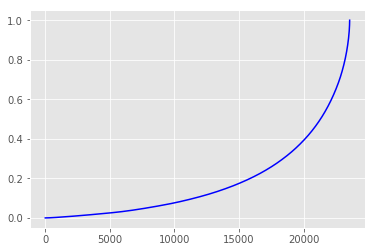

In [46]:
user_amount.prop.plot(color = 'blue')

In [33]:
user_products=df.groupby('user_id').order_products.sum().sort_values().reset_index()
user_products_sum=user_products['order_products'].sum()
user_products['products_cumsum'],user_products['prop']=user_products.order_products.cumsum(),(user_products.order_products/user_products_sum).cumsum()
user_products.tail()

,user_id,order_products,products_cumsum,prop
23565,19339,378,164881,0.982130
23566,7931,514,165395,0.985192
23567,7983,536,165931,0.988385
23568,7592,917,166848,0.993847
23569,14048,1033,167881,1.000000


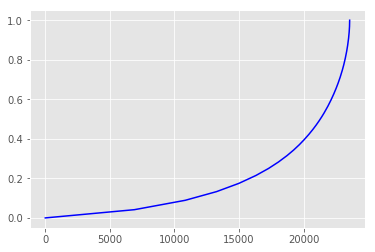

In [45]:
user_products.prop.plot(color = 'blue')

In [36]:
order_date_min,order_date_max=df.groupby('user_id').order_date.min(),df.groupby('user_id').order_date.max()

In [37]:
(order_date_max-order_date_min).head(10)#确定每位顾客的生命周期

user_id
1      0 days
2      0 days
3    511 days
4    345 days
5    367 days
6      0 days
7    445 days
8    452 days
9    523 days
10     0 days
Name: order_date, dtype: timedelta64[ns]

In [38]:
(order_date_max-order_date_min).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: order_date, dtype: object

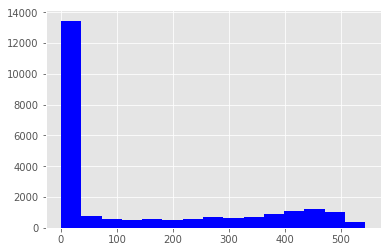

In [44]:
((order_date_max-order_date_min)/np.timedelta64(1,'D')).hist(bins=15,color = 'blue')

In [55]:
life_time=(order_date_max-order_date_min).reset_index()
life_time.head()

,user_id,order_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


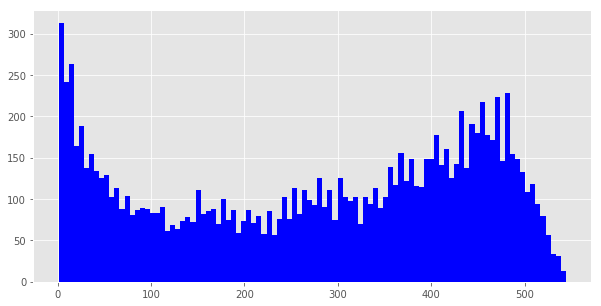

In [56]:
life_time['life_time']=life_time.order_date/np.timedelta64(1,'D')
life_time[life_time.life_time>0].life_time.hist(bins=100,figsize=(10,5),color = 'blue')#排除仅消费一次的用户

In [57]:
life_time[life_time.life_time>0].life_time.describe()

count    11516.000000
mean       276.044807
std        166.633990
min          1.000000
25%        117.000000
50%        302.000000
75%        429.000000
max        544.000000
Name: life_time, dtype: float64